In [76]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt 

In [84]:
import math
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (int(row1[i]) - int(row2[i]))**2
        return np.sqrt(distance)

In [85]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\File\\lv.csv")

In [86]:
X = df.to_numpy()
X = X[:,3:11]

In [87]:
Y = df.to_numpy()
Y = Y[:,10]

In [88]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)


In [98]:
accuracy = []
K = np.arange(1,100)  ## K is a list [1,2,.....34]

In [99]:
for k in K:   
    prediction = []   
    coorect_count = 0  
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((X_train[j], dist, y_train[j]))  
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k] 
        class_counter = Counter()  
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        prediction.append(class_counter.most_common(1)[0][0])
        if(y_test[i] == prediction[i]):
            coorect_count = coorect_count + 1
    acc = coorect_count/float(len(X_test))  ## accuracy
    accuracy.append(acc)

In [100]:
max(accuracy)

0.7863247863247863

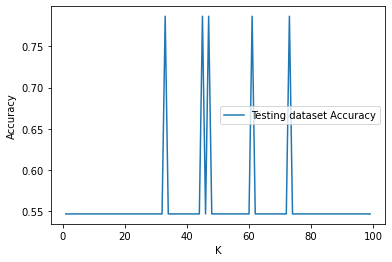

In [101]:
plt.plot(K, accuracy, label = 'Testing dataset Accuracy')
plt.legend() 
plt.xlabel('K') 
plt.ylabel('Accuracy') 
plt.show()